# Functions

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
%matplotlib inline
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [8]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState

In [9]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [10]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [11]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210720\\'
ensure_dir(exp_folder+'MI')
ensure_dir(exp_folder+'MI\\Fig')

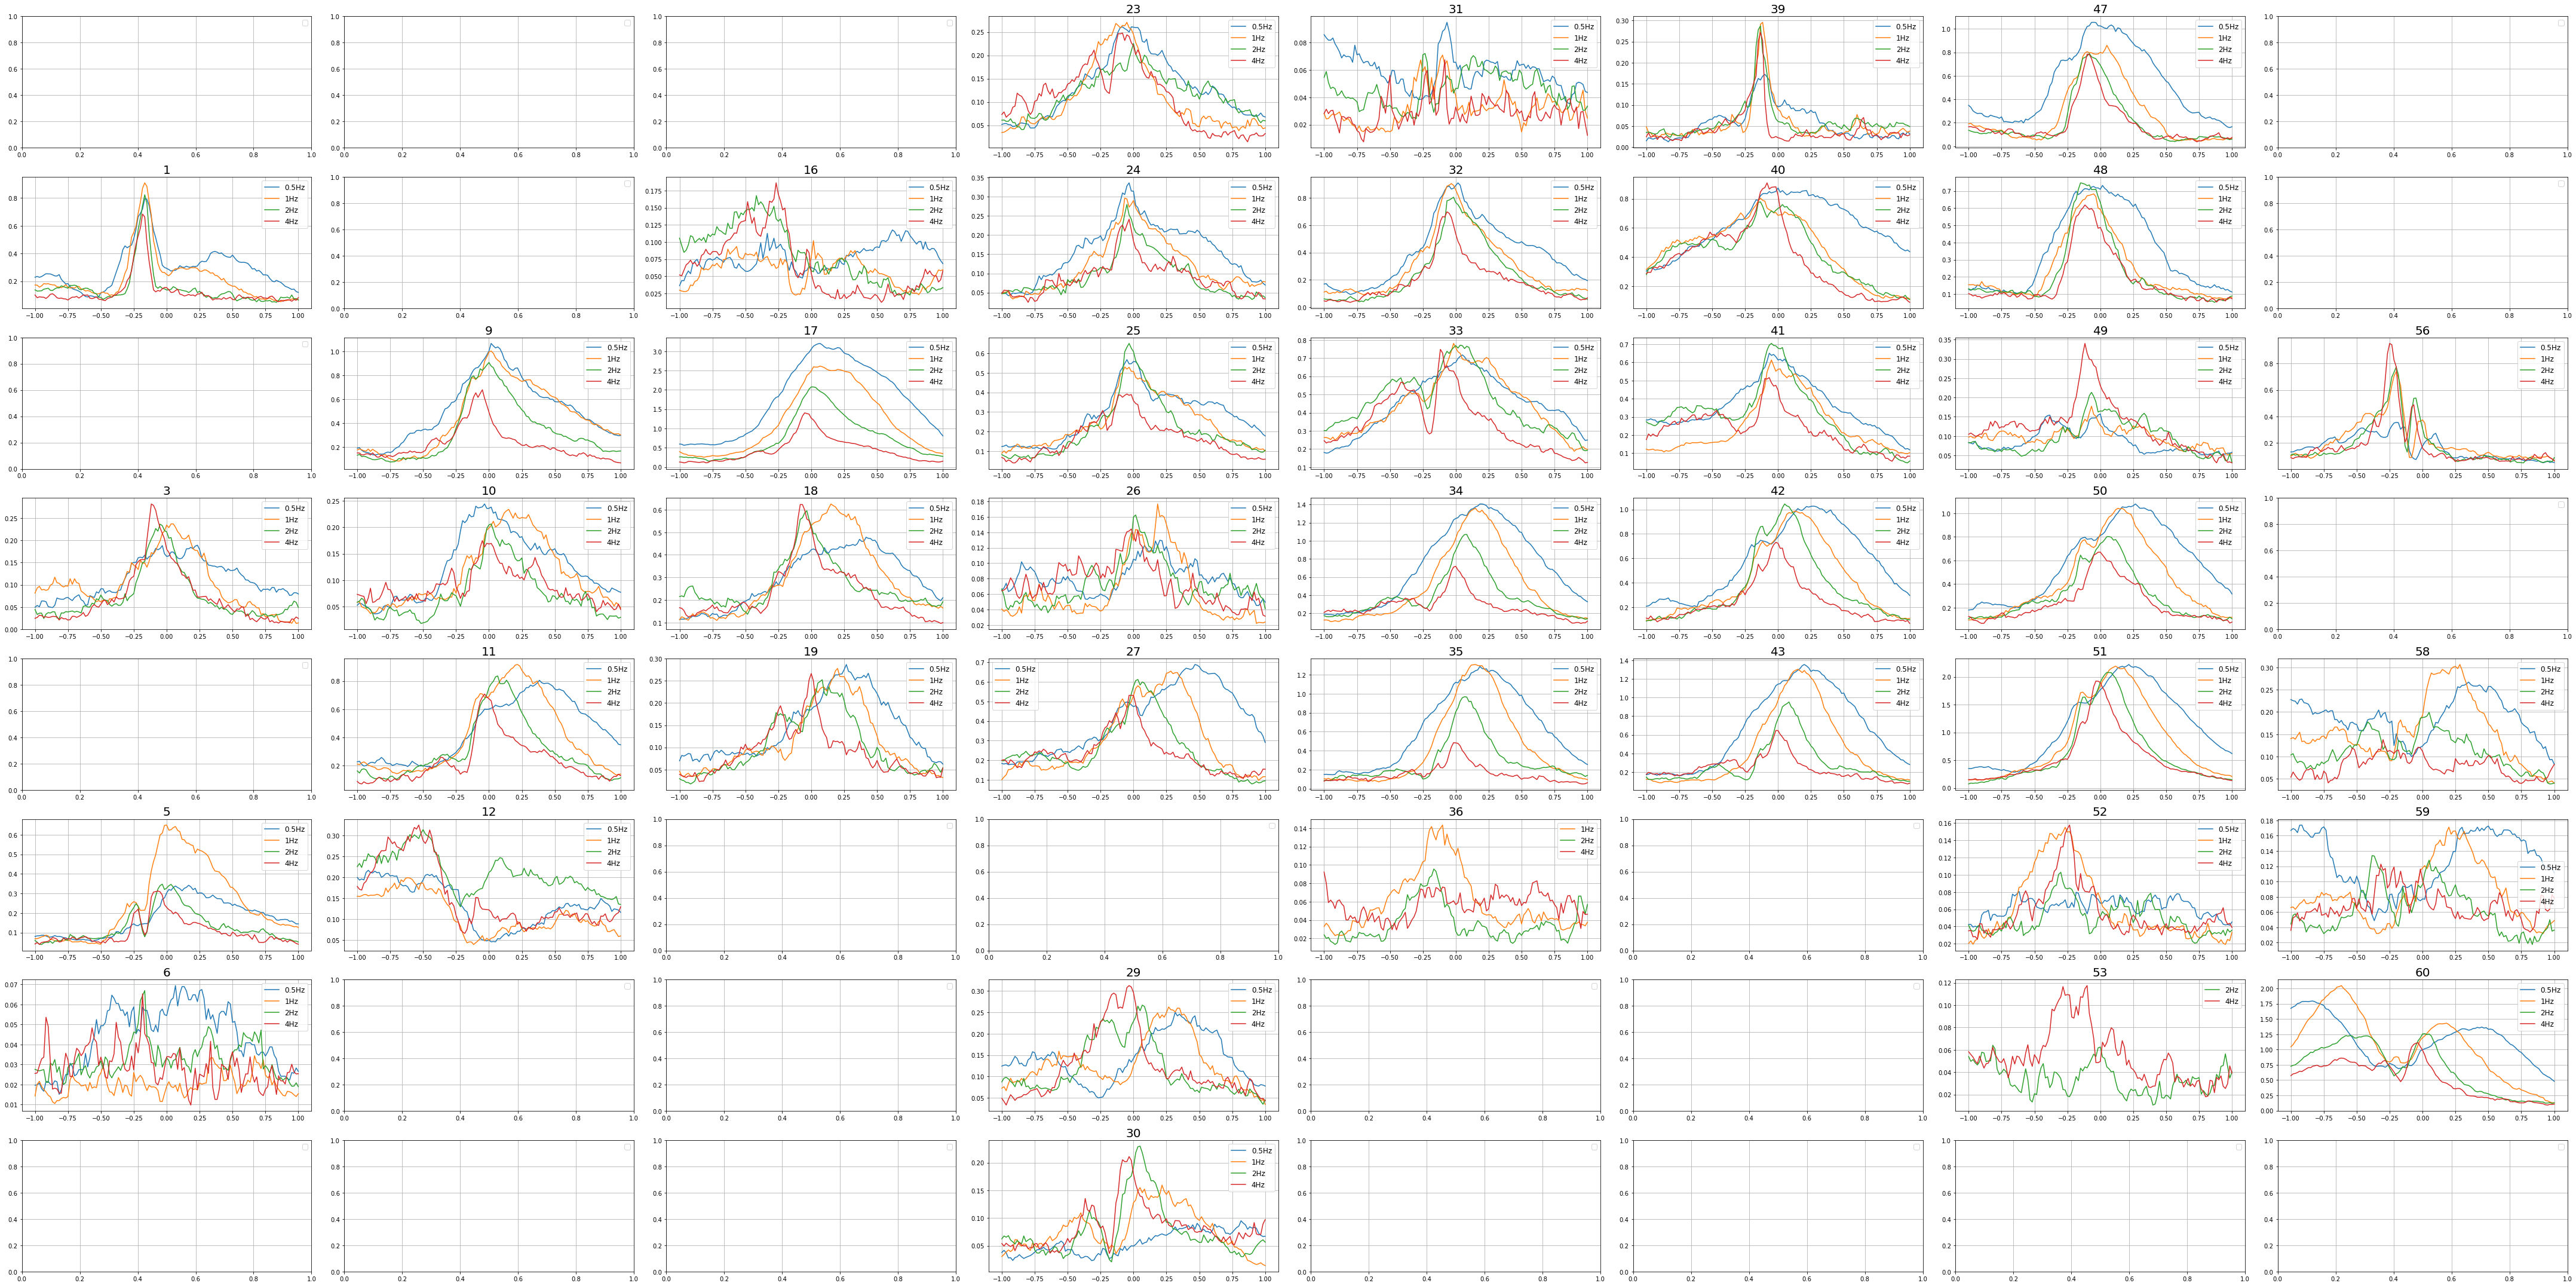

In [12]:
MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
cmind = 0
direction = 'UR_DL'
for Fc in [0.5,1,2,4]:
    filename = 'merge_0727_OUsmooth_Bright_'+direction+'_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz'
    loadfiles = np.load(exp_folder+'MI\\MI_'+filename+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]
    
    for cn in range(60):
        Information = Information_cell[cn]
        if Information == 0: continue
        MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')]
                                                         , label=str(Fc)+'Hz', color = plt.cm.tab10(cmind))
        MIdFcax[np.where(figmap == cn+1)][0].set_title(str(cn+1), fontsize = 20)
#         MIdFcax[np.where(figmap == cn+1)][0].set_xlabel(r'$\delta t$ (s)', fontsize = 16)
#         MIdFcax[np.where(figmap == cn+1)][0].set_ylabel(r'Information (bit/s)', fontsize = 16)
    cmind += 1
    
for ax1d in MIdFcax:
    for ax in ax1d:
        ax.legend(fontsize = 12)
        ax.grid()
MIdFcfig.set_size_inches(60, 30)
MIdFcfig.tight_layout()
MIdFcfig.savefig(exp_folder+'MI\\Fig\\dFc_MIx_BB.tif', bbox_inches = 'tight',pad_inches = 0.3)